# This notebook creates some basic visualizations of the data for whole discourse. The data is NOT related to any specific category.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

def create_stacked_bar_chart(raw_metrics, subject, path_to_static_folder):

    # Assuming raw_metrics is already loaded
    metrics = ['likes_received', 'likes_given', 'topics_viewed', 'posts_read', 'days_visited', 'solutions']

    # Set colors for different metrics
    colors = ['#FF6B6B', '#54A0FF', '#1DD1A1', '#F368E0', '#10AC84', '#130F40']

    # Filter out metrics where all users have value 0
    filtered_metrics = raw_metrics.set_index('user_id')[metrics].loc[:, (raw_metrics[metrics] != 0).any()]

    # Plot only if there are metrics left after filtering
    if not filtered_metrics.empty:
        ax = filtered_metrics.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors[:len(filtered_metrics.columns)])

        # Add text annotations (excluding zeros)
        for container in ax.containers:
            labels = [f"{int(val)}" if val > 0 else "" for val in container.datavalues]  # Hide 0 values
            ax.bar_label(container, labels=labels, label_type='center')

        plt.xlabel('Engagement Count')
        plt.ylabel('Users')
        plt.title(f'Most Active users ({subject})')
        plt.legend(title='Activity Type', bbox_to_anchor=(1, 1))
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        # plt.show()
        # Save the plot as an image
        viz_folder = os.path.join(path_to_static_folder,"visualizations") # Folder in which all visualizations will be stored
        os.makedirs(viz_folder, exist_ok=True)
        plt.savefig(f'{viz_folder}/most_active_users_{subject.lower().replace(" ","_")}.png')

    else:
        print("No non-zero metrics to display.")


In [ ]:
path_to_static_folder = "../static"

full_path = "..\data\course_excel_data_t1_2024\data_all_users.xlsx"
# The sheet name of our interest is "log_normalized_scores". Open this sheet from the excel, get the data and find the name of first 5 users
unnormalized_df = pd.read_excel(full_path, sheet_name="unnormalized_scores")
top_10 = unnormalized_df.head(10)
# create_stacked_bar_chart(top_10, )

In [5]:
top_10.columns

Index(['user_id', 'likes_received', 'likes_given', 'topics_viewed',
       'posts_read', 'days_visited', 'solutions', 'cheers', 'initial_score',
       'z_score'],
      dtype='object')

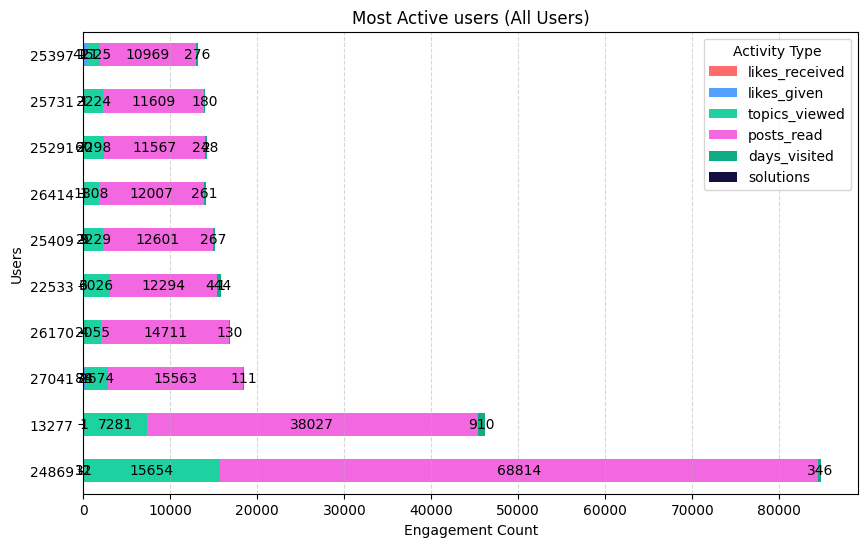

In [6]:
create_stacked_bar_chart(top_10, subject="All Users", path_to_static_folder=path_to_static_folder)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure a directory exists for saving images
os.makedirs("../static/overall_engagement_charts", exist_ok=True)

# Define the metrics to visualize
metrics = ["likes_received", "likes_given", "topics_viewed", "posts_read", "days_visited", "cheers"]
chart_paths = []  # Store image paths for Flask integration

# Generate a separate bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x="user_id", y=metric, data=top_10, palette="viridis")

    plt.xlabel("User ID")
    plt.ylabel(metric.replace("_", " ").title())
    plt.title(f"Top 10 Users - {metric.replace('_', ' ').title()}")
    plt.xticks(rotation=45)
    # plt.show()

    # Save plot as an image
    chart_path = f"../static/overall_engagement_charts/{metric}.png"
    plt.savefig(chart_path, bbox_inches="tight")
    chart_paths.append(chart_path)
    
    plt.close()  # Close the plot to avoid overlapping figures

print("Charts saved successfully:", chart_paths)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3024\3172519173.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="user_id", y=metric, data=top_10, palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3024\3172519173.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="user_id", y=metric, data=top_10, palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3024\3172519173.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="user_id", y=metric, data=top_10, palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipyke

Charts saved successfully: ['../static/overall_engagement_charts/likes_received.png', '../static/overall_engagement_charts/likes_given.png', '../static/overall_engagement_charts/topics_viewed.png', '../static/overall_engagement_charts/posts_read.png', '../static/overall_engagement_charts/days_visited.png', '../static/overall_engagement_charts/cheers.png']
